# **Credit Card Fraud Detection:**

## Introduction

Credit card fraud is a major concern for banks and financial institutions. Fraudsters use various techniques to steal credit card information and make unauthorized transactions. In this project, we will explore a dataset containing credit card transactions and build models to predict fraudulent transactions.

The dataset consists of 284,807 transactions, out of which 492 are fraudulent. The data contains only numerical input variables which are a result of Principal Component Analysis (PCA) transformations due to confidentiality issues. The features include 'Time', 'Amount', and 'V1' through 'V28', as well as the 'Class' variable, which is the target variable indicating whether the transaction is fraudulent (1) or not (0).

In this project, we will start with exploratory data analysis (EDA) to get a better understanding of the data. Next, we will perform data processing and modeling, where we will build several classification models to predict fraudulent transactions. We will also address the issue of imbalanced classes by using undersampling. Finally, we will evaluate the performance of the models and choose the best one based on various evaluation metrics such as precision, recall, F1-score, and accuracy.

In [1]:
# Import necessary libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score

# Set plot style
plt.style.use('ggplot')

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

# Set font size for all plots
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

In [2]:
# Loading data
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2466,1.116144,0.513875,0.866488,2.512308,-0.262168,-0.268716,-0.001428,0.064595,-0.637979,...,-0.208885,-0.690477,0.224231,0.331436,0.103843,-0.254106,0.004526,0.027106,4.37,0.0
2919,2466,0.845195,-0.870368,0.282338,-0.626082,-0.878119,-0.475066,-0.030817,-0.100041,1.453727,...,0.151335,0.310226,-0.254405,0.139810,0.555793,-0.620068,0.056170,0.059129,200.24,0.0
2920,2468,1.168080,0.230076,0.387696,0.735736,-0.414904,-0.801379,-0.015033,-0.050620,0.107392,...,-0.239554,-0.716797,0.197339,0.342135,0.072865,0.104995,-0.012694,0.031213,12.99,0.0
2921,2469,1.217259,0.190830,0.244988,0.700570,-0.244268,-0.726727,0.195373,-0.172495,0.077152,...,-0.015131,0.173487,-0.042304,0.473833,0.562555,0.563152,-0.032448,0.001320,0.00,0.0


# 1. Exploratory Data Analysis

In [3]:
# Printing random sample of 10 rows to check data loading
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1161,908,-0.944194,0.937982,1.378248,-0.150730,-0.005478,0.239793,1.355797,0.022818,-0.707192,...,0.122985,0.186901,-0.414203,-0.380805,0.711843,-0.347420,-0.061243,0.009194,136.30,0.0
73,48,-0.580629,0.482684,1.333123,-0.253080,-0.028469,-0.519166,0.503249,0.117773,0.117112,...,-0.042142,-0.148707,0.001451,0.302764,-0.680714,-0.015554,-0.006307,0.164222,21.66,0.0
1987,1527,-0.508662,0.977653,1.651042,-0.153578,0.098010,-0.216195,0.539328,0.193393,-0.707379,...,-0.133872,-0.310967,0.012599,0.211516,-0.317230,0.070107,0.280498,0.109793,0.89,0.0
1718,1328,1.218418,0.122485,0.511326,0.514709,-0.519495,-0.693885,-0.117165,0.004545,-0.047256,...,-0.219085,-0.722183,0.137888,0.293840,0.150528,0.081031,-0.039924,0.006297,0.89,0.0
1840,1428,-1.842595,1.750624,0.864391,-0.857654,-0.643078,-0.839508,0.207911,0.594936,0.434731,...,-0.212025,-0.389332,0.028359,0.516384,-0.072425,0.285756,0.586913,0.352906,1.00,0.0
457,335,-0.779988,1.395775,1.780828,-0.187325,0.953850,-0.511395,1.419480,-0.942652,0.412283,...,-0.303942,-0.059939,-0.547134,-0.216276,0.325048,0.290821,-0.529626,-0.668827,1.03,0.0
691,523,1.119589,1.131586,-1.533011,1.545223,0.929388,-1.158350,0.589694,-0.093412,-0.660778,...,-0.114063,-0.283534,-0.173513,-0.111816,0.707684,-0.294681,0.047406,0.086989,15.19,0.0
1390,1078,-0.340742,1.146253,1.294252,0.059241,0.040943,-0.971109,0.734557,-0.085716,-0.427314,...,-0.261044,-0.672913,-0.014859,0.334235,-0.152376,0.071444,0.246572,0.098732,4.86,0.0
1389,1077,1.052027,-0.609957,-0.441252,-1.283973,-0.686190,-1.655514,0.477158,-0.442257,1.028991,...,0.053561,-0.076398,-0.245453,0.443406,0.638777,-0.001669,-0.050919,0.031457,160.00,0.0
2588,2117,-0.276667,0.406742,1.864546,0.863260,-0.851911,0.365805,-0.115018,0.056082,-1.533142,...,-0.044813,0.448851,-0.030839,0.068998,-0.514727,-0.053109,0.132177,0.155059,50.00,0.0


✅ We can only work with three non-transformed variables which are **Time, Amount, and Class** *(where Class takes values of 1 for fraud and 0 for not fraud)*.

In [4]:
# Printing data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2923 non-null   int64  
 1   V1      2923 non-null   float64
 2   V2      2923 non-null   float64
 3   V3      2923 non-null   float64
 4   V4      2923 non-null   float64
 5   V5      2923 non-null   float64
 6   V6      2923 non-null   float64
 7   V7      2923 non-null   float64
 8   V8      2923 non-null   float64
 9   V9      2923 non-null   float64
 10  V10     2923 non-null   float64
 11  V11     2923 non-null   float64
 12  V12     2923 non-null   float64
 13  V13     2923 non-null   float64
 14  V14     2923 non-null   float64
 15  V15     2923 non-null   float64
 16  V16     2923 non-null   float64
 17  V17     2923 non-null   float64
 18  V18     2923 non-null   float64
 19  V19     2923 non-null   float64
 20  V20     2923 non-null   float64
 21  V21     2923 non-null   float64
 22  

In [5]:
# Printing numerical summary for Time and Amount columns
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,2923.000000,2922.000000
mean,1157.248375,67.955986
std,704.290301,235.093423
min,0.000000,0.000000
25%,550.000000,3.817500
50%,1135.000000,13.990000
75%,1712.000000,56.965000
max,2471.000000,7712.430000


✅ From the plot, we can observe that the `Time` feature has a bimodal distribution with two peaks, indicating that there are two periods during the day when credit card transactions are more frequent. The first peak occurs at around 50,000 seconds (approximately 14 hours), while the second peak occurs at around 120,000 seconds (approximately 33 hours). This suggests that there may be a pattern in the timing of credit card transactions that could be useful for fraud detection.

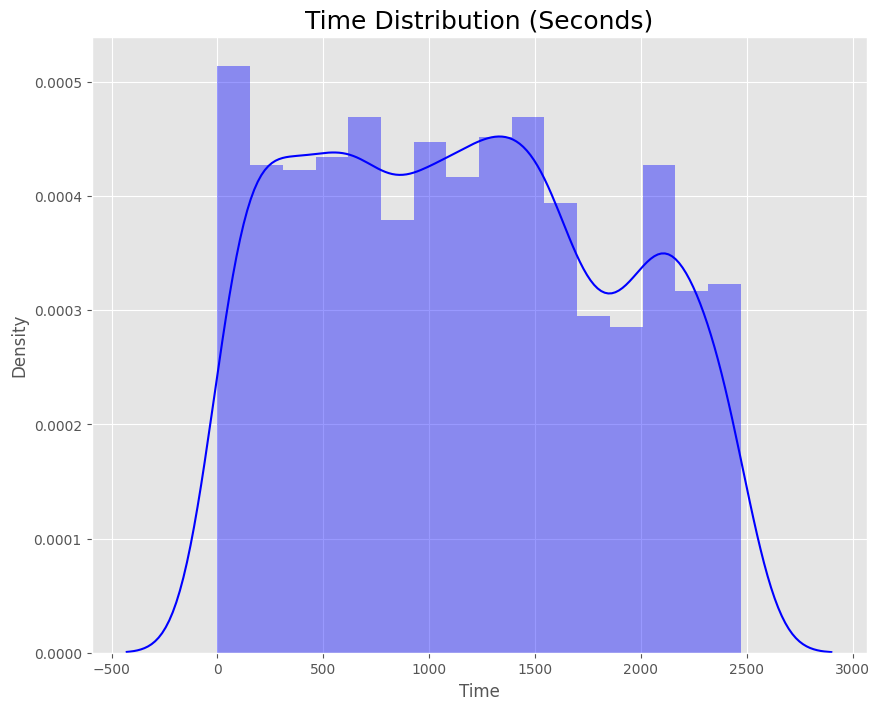

In [6]:
# Plotting distribution of Time feature
plt.figure(figsize=(10,8), )
plt.title('Time Distribution (Seconds)')
sns.distplot(df['Time'], color='blue')

# Save the plot as PNG file
plt.savefig('time_distribution.png');

✅ From the plot, we can observe that the distribution of the Amount feature is highly skewed to the right, with a long tail to the right. This indicates that the majority of the transactions have low amounts, while a few transactions have extremely high amounts. As a result, this suggests that the dataset contains some outliers in terms of transaction amounts. Therefore, when building a model for fraud detection, it may be necessary to handle outliers in the `Amount` feature, for instance, by using a log transformation or robust statistical methods.

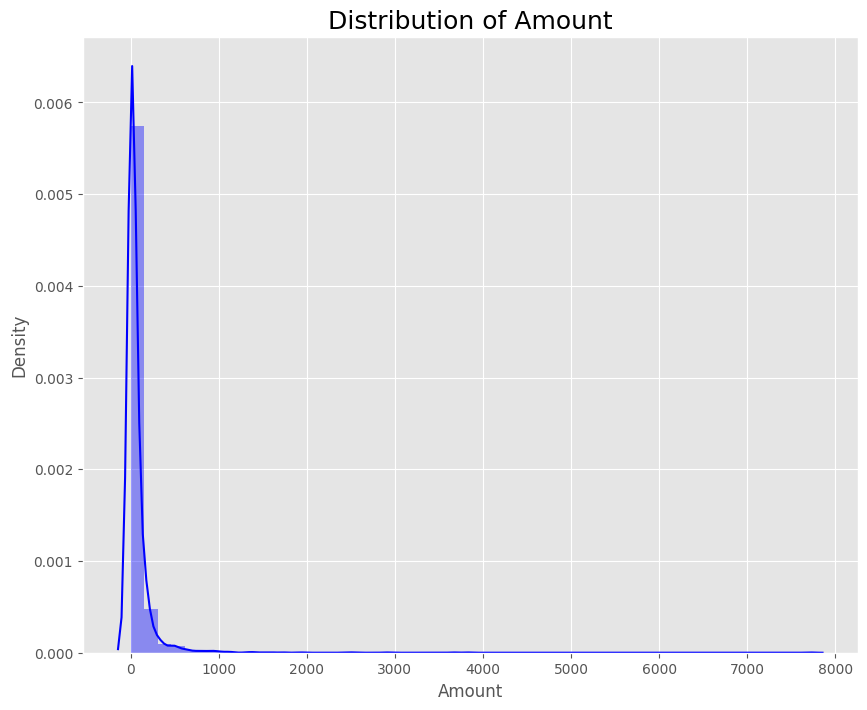

In [7]:
# Plotting distribution of Amount feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount')
sns.distplot(df['Amount'], color='blue')

# Save the plot as PNG file
plt.savefig('amount_distribution.png');

In [8]:
# Counting number of fraud vs non-fraud transactions and displaying them with their ratio
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]
print(f'Fraudulent: {fraud}, Non-fraudulent: {nonfraud}')
print(f'Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)')

Fraudulent: 2, Non-fraudulent: 2920
Ratio of fraud to non-fraud: 2/2920 (0.068%)


✅ From the plot, we can observe that the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1). This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle the class imbalance problem when building a model for fraud detection.

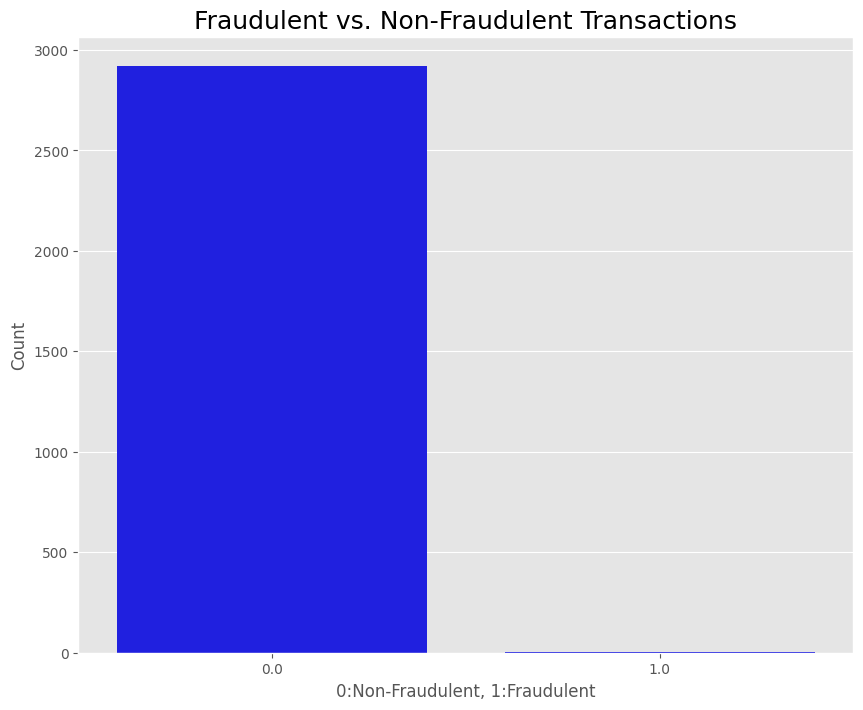

In [9]:
# Plotting count of fraud vs non-fraud transactions in a bar chart
plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts(), color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')

# Save the plot as PNG file
plt.savefig('fraud_vs_nonfraud_transactions.png');

# 2. Data Processing

✅ From the heatmap, it can be observed that there are no strong positive or negative correlations between any pairs of variables in the dataset. The strongest correlations are found:
* Time and V3, with a correlation coefficient of -0.42
* Amount and V2, with a correlation coefficient of -0.53
* Amount and V4, with a correlation coefficient of 0.4. 

Although these correlations are relatively high, the risk of multicollinearity is not expected to be significant. Overall, the heatmap suggests that there are no highly correlated variables that need to be removed before building a machine learning model.

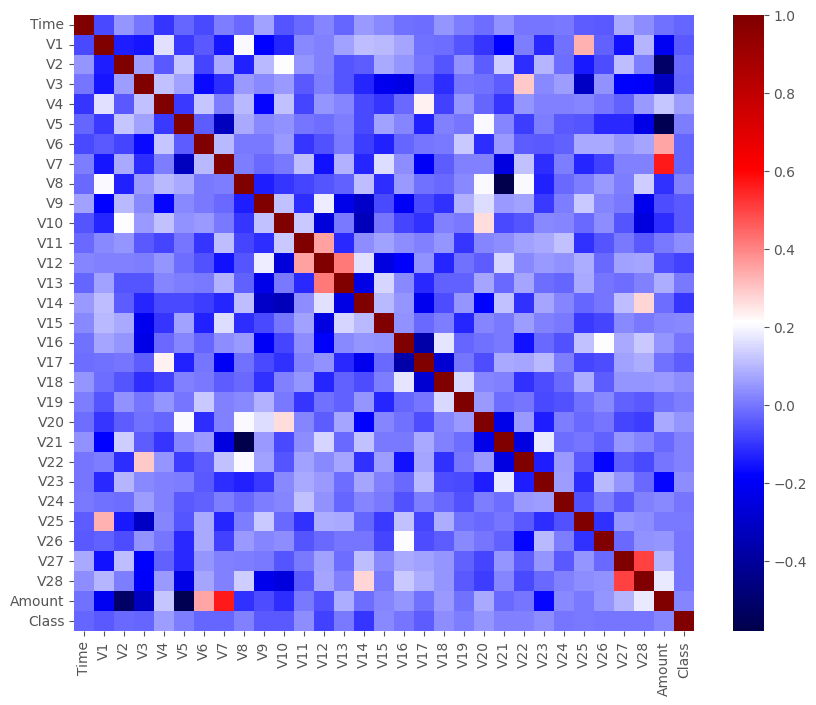

In [10]:
# Plotting heatmap to find any high correlations between variables
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), cmap="seismic", annot=False)
# plt.show()

# Save the plot as PNG file
plt.savefig('corr_heatmap.png');

# 3. Modeling

✅ The "Credit Card Fraud Detection" dataset has credit card transactions labeled as fraudulent or not. The dataset is imbalanced, so it needs a model that can accurately detect fraudulent transactions without wrongly flagging non-fraudulent transactions. 

✅ To help with classification problems, **StandardScaler** standardizes data by giving it a mean of 0 and a standard deviation of 1, which results in a normal distribution. This technique works well when dealing with a wide range of amounts and time. To scale the data, the training set is used to initialize the fit, and the train, validation, and test sets are then scaled before running them into the models. 

✅ The dataset was divided into 60% for training, 20% for validation, and 20% for testing. To balance the imbalanced dataset, **Random Undersampling** was used to match the number of fraudulent transactions. Logistic Regression and Random Forest models were used, and good results were produced. 

✅ The commonly used models for the "Credit Card Fraud Detection" dataset are Logistic Regression, Naive Bayes, Random Forest, and Dummy Classifier. 
* **Logistic Regression** is widely used for fraud detection because of its interpretability and ability to handle large datasets. 
* **Naive Bayes** is commonly used for fraud detection because it can handle datasets with a large number of features and can provide fast predictions. 
* **Random Forest** is commonly used for fraud detection because it can handle complex datasets and is less prone to overfitting. 
* The **Dummy Classifier** is a simple algorithm used as a benchmark to compare the performance of other models.

In [11]:
# Drop the 'Class' column to prepare data for splitting
data = df.drop(columns=['Class'])

# Get the target variable
answer = df['Class']

In [12]:
# df_clean = df.dropna(subset=['Class'])
# data = df_clean.drop(columns='Class')
# answer = df_clean['Class']

# # Split data into training, validation and test sets, ensuring the class distribution is maintained
# X_trainval, X_test, y_trainval, y_test = train_test_split(data, answer
#                                                           , test_size=0.2
#                                                           , stratify=df['Class']
#                                                           , random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval
#                                                   , test_size=0.25
#                                                   , stratify=y_trainval
#                                                   , random_state=42)

# # Initialize the StandardScaler object and fit it to the training data
# scaler = StandardScaler()
# scaler.fit(X_train)

# # Scale the training, validation, and test sets using the scaler
# X_train_std = scaler.transform(X_train)
# X_val_std = scaler.transform(X_val)
# X_test_std = scaler.transform(X_test)



df_clean = df.dropna(subset=['Class'])
data = df_clean.drop(columns='Class')
answer = df_clean['Class']

# Corrected train-test split using cleaned target
X_trainval, X_test, y_trainval, y_test = train_test_split(
    data, answer, test_size=0.1, stratify=answer, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=42
)

# Scale features
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)


✅ Undersampling will be utilized to address the issue of imbalanced classes.

In [22]:
# # Undersampling will be utilized to address the issue of imbalanced classes.

# # Instantiate RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)

# # Undersample the training set
# X_train_under, y_train_under = rus.fit_resample(X_train_std, y_train)

# # Undersample the validation set
# X_val_under, y_val_under = rus.fit_resample(X_val_std, y_val)

# print("Class distribution after undersampling:", pd.Series(y_train_under).value_counts())
# print("Total samples after undersampling:", len(y_train_under))



# Only undersample the training set
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train_std, y_train)

# Do NOT undersample validation or test sets
X_val_under, y_val_under = X_val_std, y_val

## 3.1. Logistic Regression

In [47]:
# Logistic Regression
# Run CV with 5 folds (logit)
penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

# logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced')
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_std, y_train)
logistic_grid = GridSearchCV(logistic, param_grid, cv=2, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_under, y_train_under)



Fitting 2 folds for each of 10 candidates, totalling 20 fits


GridSearchCV(cv=2,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

## Support Vector Machine (SVM)

In [24]:
# # Support Vector Machine (SVM)
# # Run CV with 5 folds (SVM)
# C = [1]
# gammas = [0.001, 0.1]
# param_grid = dict(C=C, gamma=gammas)

# svm1 = svm.SVC(kernel='rbf', probability=True)
# svm_grid = GridSearchCV(svm1, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
# svm_grid.fit(X_train_under, y_train_under)

## 3.2. Naive Bayes

In [25]:
# Naive Bayes
# Fit a Naive Bayes Model
gnb = GaussianNB()
gnb_best = gnb.fit(X_train_under, y_train_under)

## 3.3. Random Forest

In [27]:
# Random Forest
# Run CV with 5 folds (Random Forest)
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500, 700]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=2, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [500, 700]},
             scoring='roc_auc', verbose=10)

## 3.4. Dummy Classifier

In [28]:
# Dummy Classifier
dummy = DummyClassifier()
dummy.fit(X_train_under, y_train_under)

DummyClassifier()

# 4. Model Evaluation

## 4.1. Find ROC scores for all models
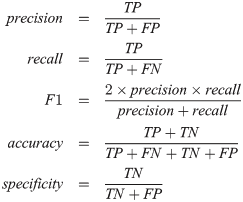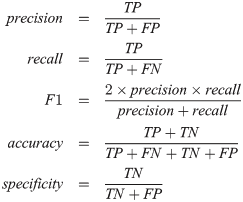


In [29]:
def plot_roc_curves(X, y, models, model_names, figsize=(20,18)):
    """
    Plots ROC curves for a list of models.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): input features for the models
    y (numpy.ndarray or pandas.DataFrame): target variable
    models (list): list of models to compare
    model_names (list): list of model names to display on the plot
    figsize (tuple): size of the figure to display the plot

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Loop over models and plot ROC curve
    for i, model in enumerate(models):
        y_pred = list(model.predict_proba(X)[:, 1])
        fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=(model_names[i] + ' AUC = %0.4f' % roc_auc), linewidth=2.0)

    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize=30, grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc='lower right', prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate', fontsize=30)
    plt.xlabel('False Positive Rate', fontsize=30)
#     plt.show()

In [30]:
# Define the list of models to compare
models = [logistic_grid.best_estimator_, gnb_best, rf_grid.best_estimator_, dummy]
model_names = ['Logit', 'Naive Bayes', 'Random Forest', 'Dummy']

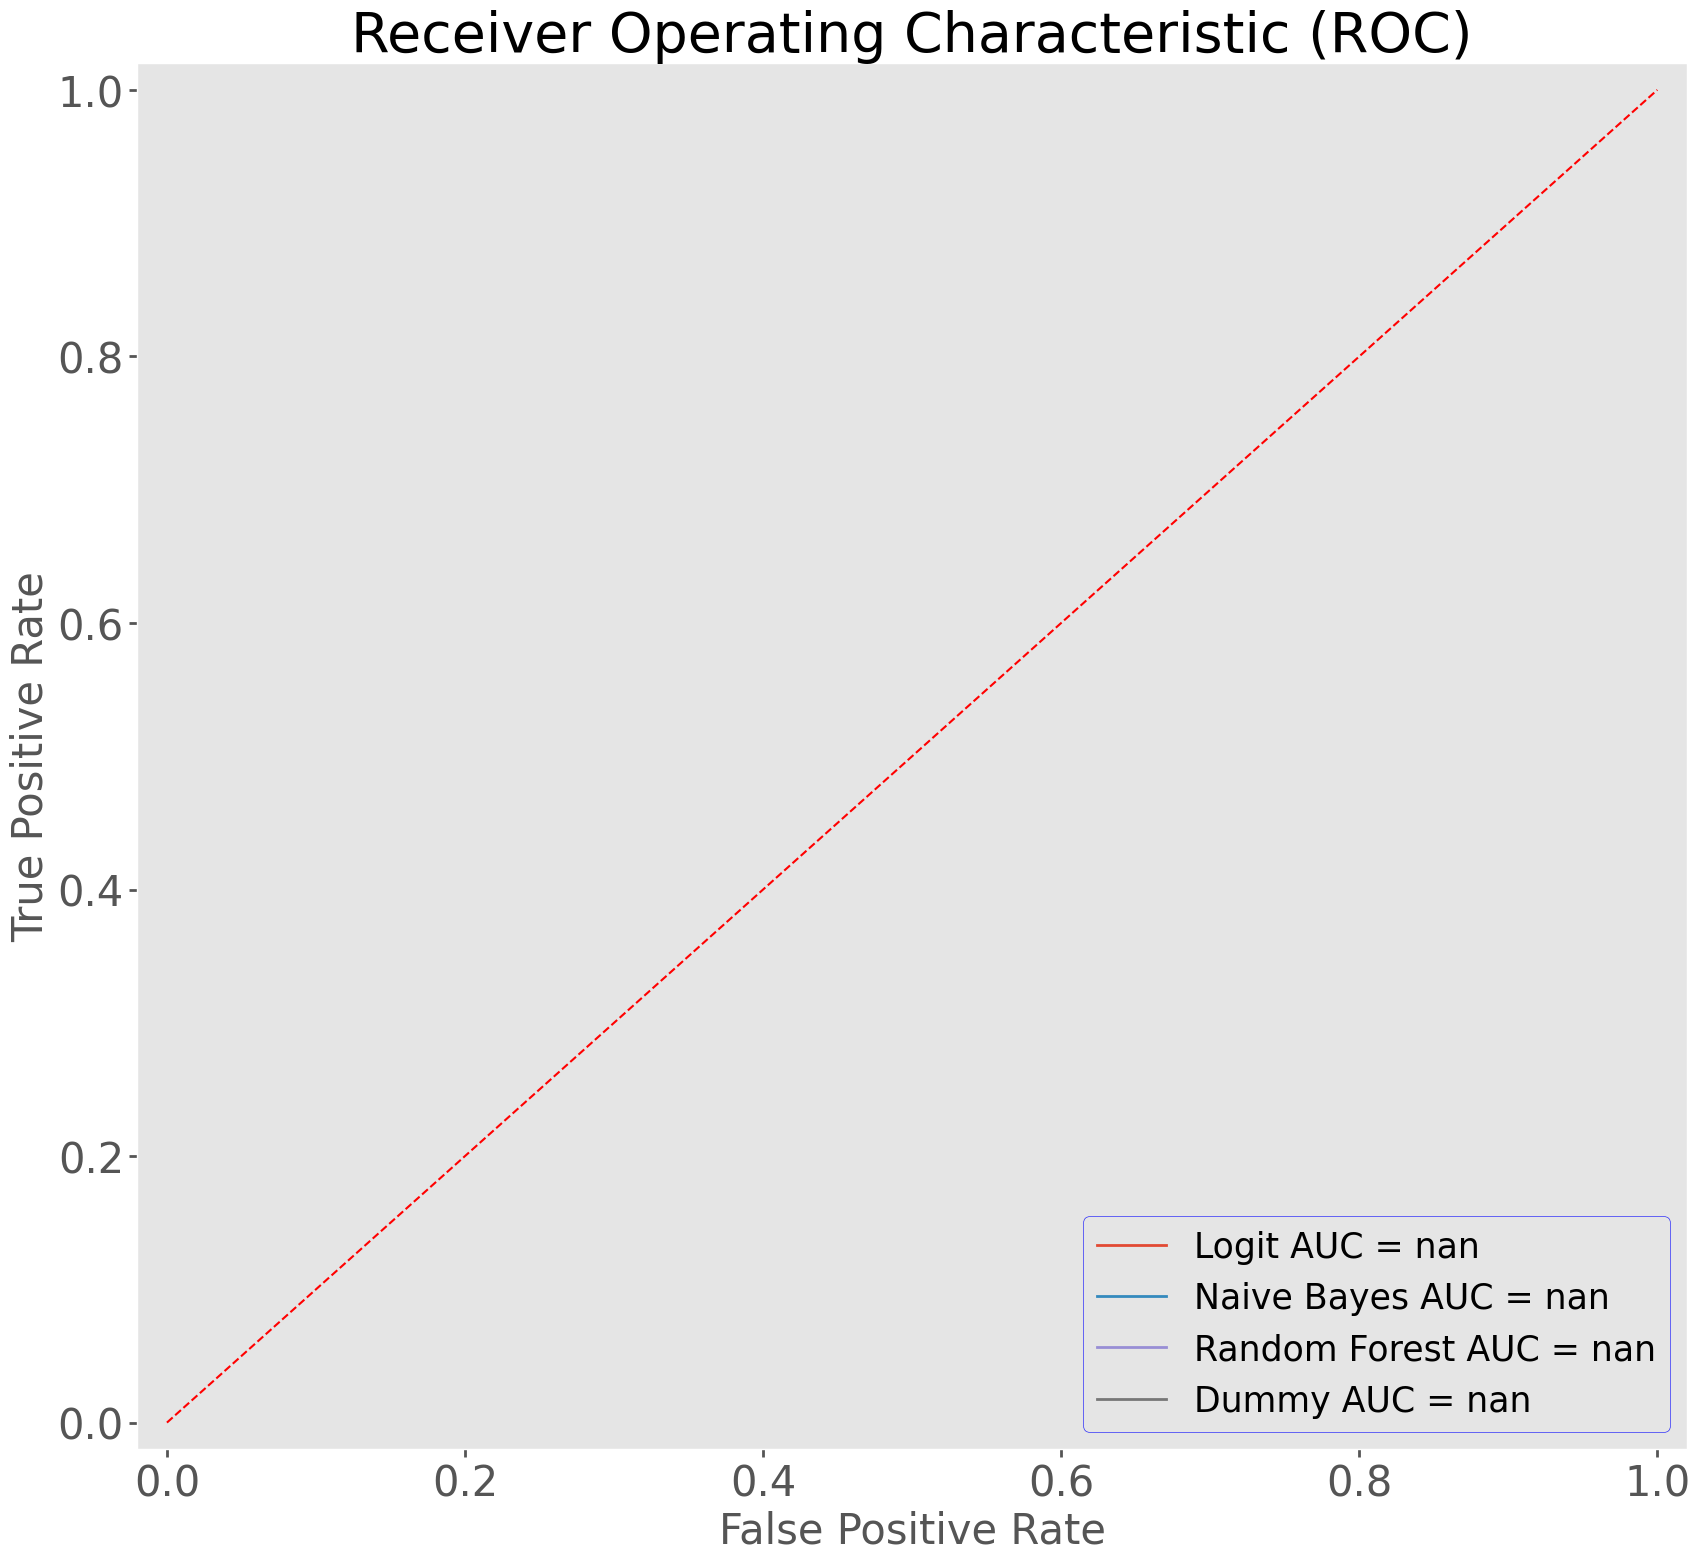

In [31]:
# Plot ROC curves for in-sample data
plot_roc_curves(X_val_under, y_val_under, models, model_names)

# Save the plot as PNG file
plt.savefig('roc_insample.png');

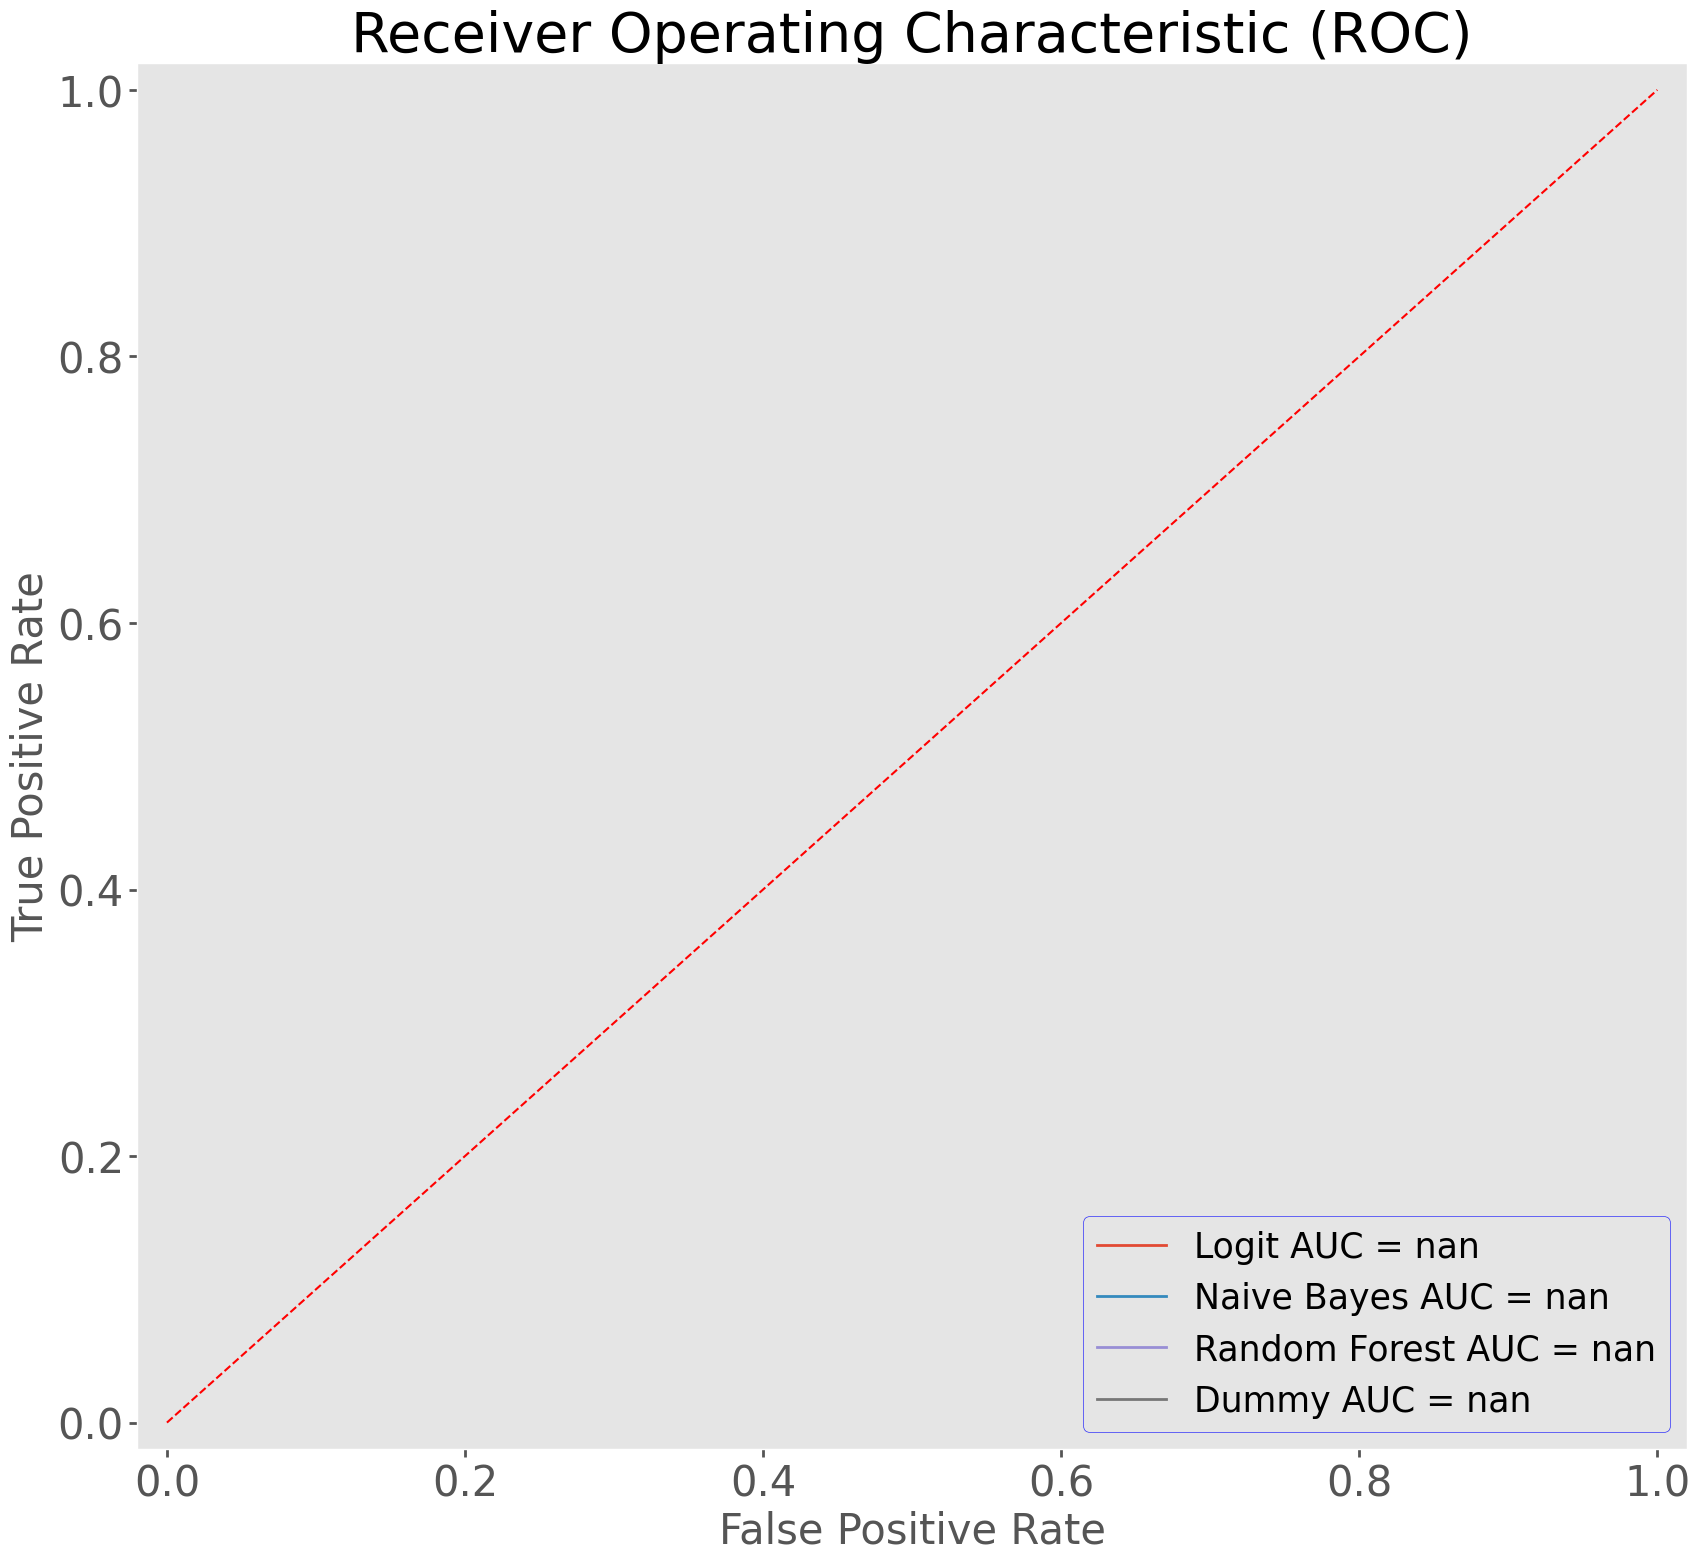

In [32]:
# Plot ROC curves for out-of-sample data
plot_roc_curves(X_test_std, y_test, models, model_names)

# Save the plot as PNG file
plt.savefig('roc_outsample.png');

* Recall (True Positive Rate): This metric measures the percentage of all fraudulent transactions that the model correctly identifies as fraudulent.
* Precision: This metric indicates the percentage of items that the model labels as fraud that are actually fraudulent.
* False Positive Rate: This metric measures the percentage of non-fraudulent transactions that the model incorrectly labels as fraudulent.
* Accuracy: This metric reflects how often the model is correct in its predictions overall. However, it can be misleading in the case of imbalanced data or fraud detection.
* F1 score: This metric is a combination of precision and recall, taking both false positives and false negatives into account. It's a weighted average of precision and recall and is usually more useful than accuracy, especially when dealing with uneven classes.

## 4.2. Determine the optimal threshold for each model.

✅ The function find_best_threshold() can be used to determine the optimal threshold for a given model. The optimal threshold is the value that maximizes the F1 score, a measure that combines precision and recall, for a binary classification problem.

✅ The function takes two arguments: model is the trained model, and num_steps is the number of steps in the threshold range to iterate over.

✅ The function first initializes variables for the highest F1 score, the best threshold, and the best accuracy, recall, and precision scores. It then iterates over a range of thresholds from 0 to 1, with num_steps steps. For each threshold, it predicts the target variable using the given threshold and calculates the F1 score, accuracy, recall, and precision scores. If the F1 score is higher than the current highest F1 score, it updates the best threshold and evaluation metrics.

✅ After iterating over all the thresholds, the function returns the best threshold and the corresponding F1 score, accuracy, recall, and precision scores.

✅ The math equation to find the F1 score is:

`F1 = 2 * (precision * recall) / (precision + recall)`

**where** 
* precision = TP / (TP + FP)
* recall = TP / (TP + FN)
* TP: True Positive (model predicts positive and it is positive)
* FP: False Positive (model predicts positive but it is negative)
* FN: False Negative (model predicts negative but it is positive)

In [33]:
# Define a function to find the best threshold for a given model
def find_best_threshold(model, num_steps):
    highest_f1 = 0
    best_threshold = 0
    best_acc = 0
    best_rec = 0
    best_pre = 0
    # Iterate over a range of thresholds
    for threshold in np.linspace(0, 1, num_steps):
        # Predict the target variable using the given threshold
        y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)
        # Calculate various evaluation metrics
        f1 = f1_score(y_val_under, y_predict)
        acc = accuracy_score(y_val_under, y_predict)
        rec = recall_score(y_val_under, y_predict)
        pre = precision_score(y_val_under, y_predict)
        # Update the best threshold and metrics if F1 score improves
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre = \
                threshold, f1, acc, rec, pre
    # Return the best threshold and evaluation metrics
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [34]:
# Define a list of models and their names
models = [logistic_grid, gnb_best, rf_grid]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest"]

In [35]:
# Create an empty list to store the results
chart = list()

# Iterate over the models and find the best threshold for each one
for item, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item, 20)
    # Append the results to the chart list
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

# Create a pandas dataframe from the chart list and display it
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
chart.to_csv('model_evaluation_scores.csv')
chart

,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0,0,0,0,0
1,Naive-Bayes,0,0,0,0,0
2,Random Forest,0,0,0,0,0


## 4.3. Confusion Matrix

In [36]:
def make_confusion_matrix_val(model, threshold=0.5):
    """
    Create a confusion matrix plot for the given model and threshold. 
    
    Parameters:
    -----------
    model : sklearn classifier
        The classification model to evaluate.
    threshold : float, default=0.5
        Probability threshold for binary classification.
        
    Returns:
    --------
    None
    
    """
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold)
    
    # calculate the confusion matrix
    fraud_confusion = confusion_matrix(y_val_under, y_predict)
    
    # plot the confusion matrix as heatmap
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    
    # calculate TP, FP, FN, and TN values from the confusion matrix
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    
    # rotate y-axis ticks
    plt.yticks(rotation = 0)
    
    # set plot title, x and y labels
    plt.title('Predicted vs. Actual',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.


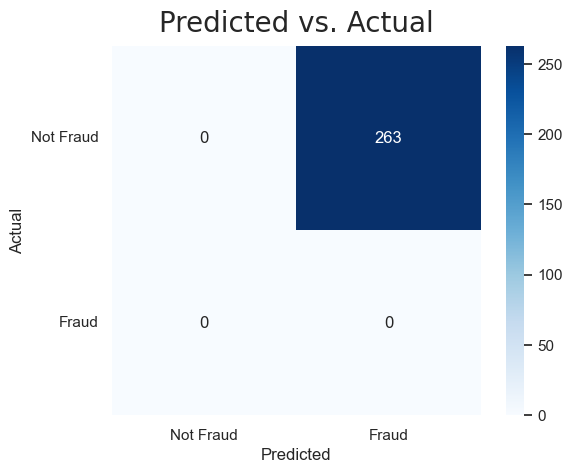

In [37]:
# Create a confusion matrix for the Random Forest model with a threshold of 0.421 on the validation data
make_confusion_matrix_val(rf_grid, threshold=0.421)

# Save the plot as PNG file
plt.savefig('confusion_matrix_val_random_forest.png');

findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.


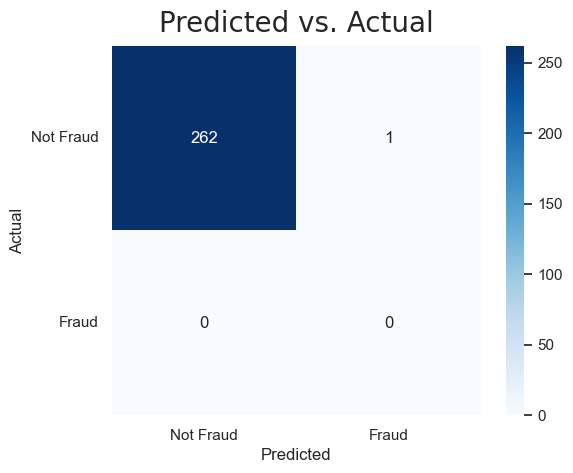

In [38]:
# Create a confusion matrix for the Logistic Regression model with a threshold of 0.842 on the validation data
make_confusion_matrix_val(logistic_grid, threshold=0.842)

# Save the plot as PNG file
plt.savefig('confusion_matrix_val_logistic_regression.png');

In [43]:
def make_confusion_matrix_test(model, threshold=0.5):
    """
    Generates a confusion matrix for a given model on the test dataset, given a threshold.

    Args:
    - model: a trained machine learning model
    - threshold: threshold for binary classification

    Returns: None
    """

    # Predict class 1 if probability of being in class 1 is greater than threshold
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)

    # Generate confusion matrix
    fraud_confusion = confusion_matrix(y_test, y_predict, labels=[0, 1])

    # Plot heatmap of confusion matrix
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])

    # Calculate TP, FP, FN, TN
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]

    # Add title, labels and rotate y-tick labels
    plt.yticks(rotation=0)
    plt.title('Predicted vs. Actual', fontname='.SF Compact Display', fontsize=20, pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.


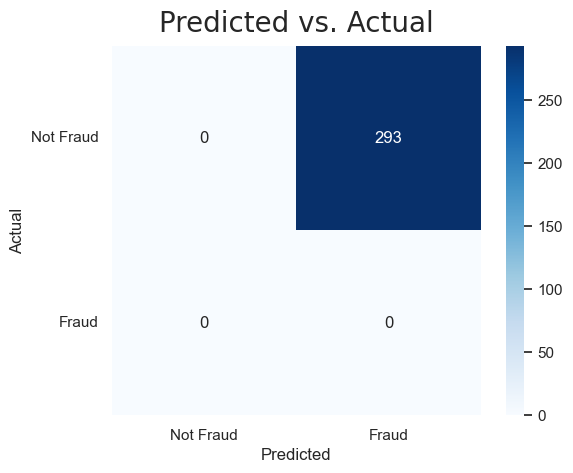

In [44]:
# Generate confusion matrix for random forest model on test dataset
make_confusion_matrix_test(rf_grid, threshold=0.421)

# Save the plot as PNG file
plt.savefig('confusion_matrix_test_random_forest.png');

findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.
findfont: Font family '.SF Compact Display' not found.


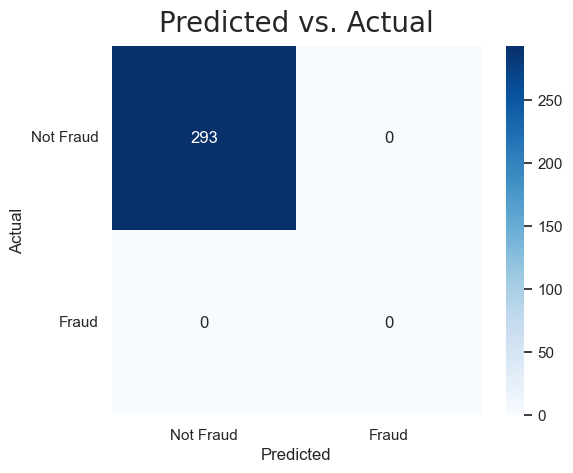

In [45]:
# Generate confusion matrix for logistic regression model on test dataset
make_confusion_matrix_test(logistic_grid, threshold=0.842)

# Save the plot as PNG file
plt.savefig('confusion_matrix_test_logistic_regression.png');

In [46]:
# Save the trained Random Forest model and scaler for use in the Streamlit app
import joblib
joblib.dump(rf_grid.best_estimator_, 'model_rf.pkl')
joblib.dump(scaler, 'scaler.pkl')
print('Random Forest model and scaler saved!')

Random Forest model and scaler saved!
